In [ ]:
!pip install opencv-contrib-python



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_data = []
labels = []
root_dir="/content/drive/MyDrive/Revan_2023/Dataset"
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)

    if os.path.isdir(folder_path):
        label = folder_name  # You can assign a label based on the folder name
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust the extensions as needed
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)  # Read the image using OpenCV
                # resizing

                image = cv2.resize(image,(200,200))
                # Normalization
                image = image / 255

                image_data.append(image)
                labels.append(label)


In [ ]:
print(image_data)
print(labels)

[array([[[0.20784314, 0.44705882, 0.4745098 ],
        [0.30588235, 0.58039216, 0.57647059],
        [0.27058824, 0.57254902, 0.60392157],
        ...,
        [0.16078431, 0.27843137, 0.37647059],
        [0.17254902, 0.3254902 , 0.38039216],
        [0.17647059, 0.36862745, 0.43921569]],

       [[0.21176471, 0.44705882, 0.55294118],
        [0.12156863, 0.36078431, 0.41960784],
        [0.11372549, 0.32941176, 0.41568627],
        ...,
        [0.17254902, 0.33333333, 0.4       ],
        [0.10980392, 0.27843137, 0.28235294],
        [0.26666667, 0.45098039, 0.5254902 ]],

       [[0.34509804, 0.61176471, 0.71764706],
        [0.06666667, 0.29411765, 0.38039216],
        [0.25098039, 0.52156863, 0.63529412],
        ...,
        [0.1254902 , 0.34901961, 0.36862745],
        [0.12941176, 0.2627451 , 0.39607843],
        [0.16470588, 0.36862745, 0.4       ]],

       ...,

       [[0.27058824, 0.54117647, 0.63529412],
        [0.10588235, 0.37254902, 0.49411765],
        [0.30196078, 

In [ ]:
print(len(labels))
print(len(image_data))

272
272



 Merged Dataset of Images From various Speices



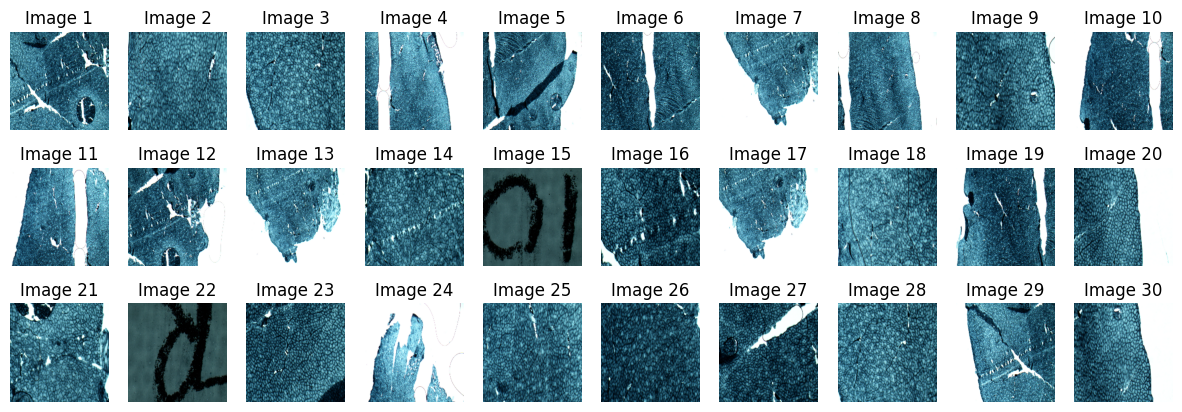

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 30
print ("\n Merged Dataset of Images From various Speices\n")
# Create a figure with subplots
fig, axs = plt.subplots(3, 10, figsize=(15, 5))

# Flatten the axs array for easier indexing
axs = axs.ravel()

# Loop through and display the images
for i in range(num_images):
    image = image_data[i]  # Replace "dataset" with your dataset variable
    axs[i].imshow(image)
    axs[i].set_title(f"Image {i + 1}")
    axs[i].axis('off')  # Turn off axis labels

plt.show()


In [ ]:

from collections import Counter
distinct_count_dict = {}
for item in labels:
    if item in distinct_count_dict:
        distinct_count_dict[item] += 1
    else:
        distinct_count_dict[item] = 1

print("Distinct Category Data with Counts :")
for item, count in distinct_count_dict.items():
    print(f"{item}: {count}")
distinct_count = len(set(labels))
print("Distinct Count:", distinct_count)

Distinct Category Data with Counts :
TR10: 38
TR39: 42
TR44: 27
TR21: 39
TR03: 38
TR36: 47
TR02: 41
Distinct Count: 7


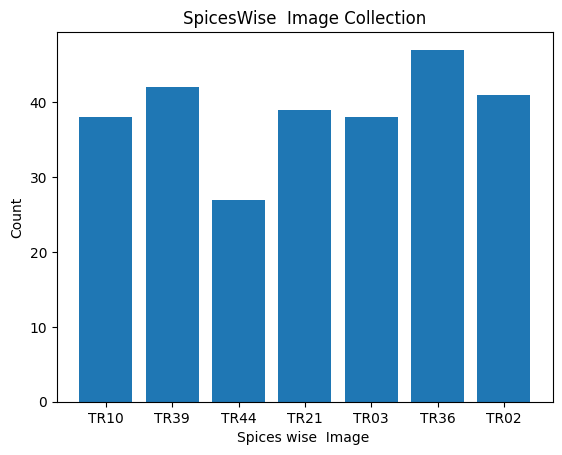

In [ ]:
distinct_data = list(distinct_count_dict.keys())
counts = list(distinct_count_dict.values())

# Create a bar chart
plt.bar(distinct_data, counts)

plt.xlabel('Spices wise  Image ')
plt.ylabel('Count')
plt.title('SpicesWise  Image Collection')


plt.show()








 Images from Spieces of Each Category
 


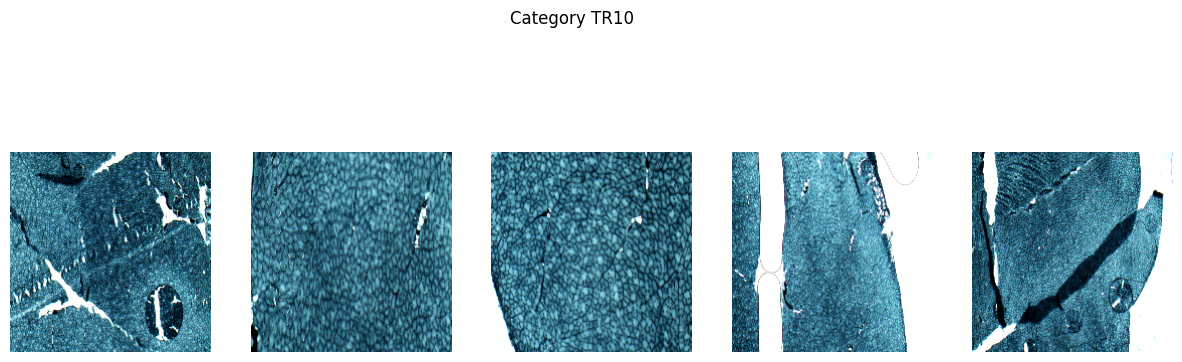

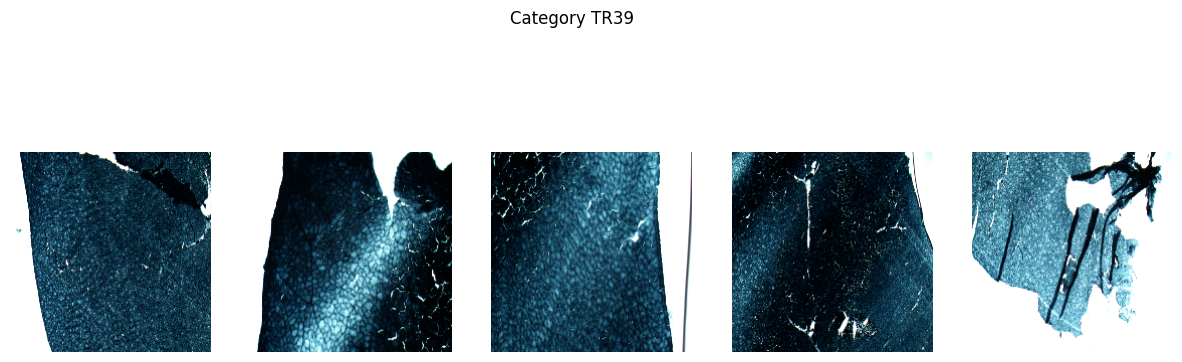

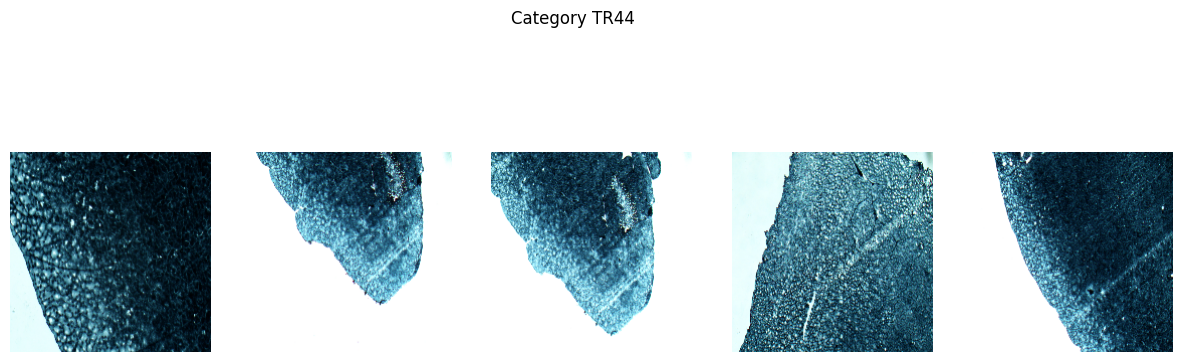

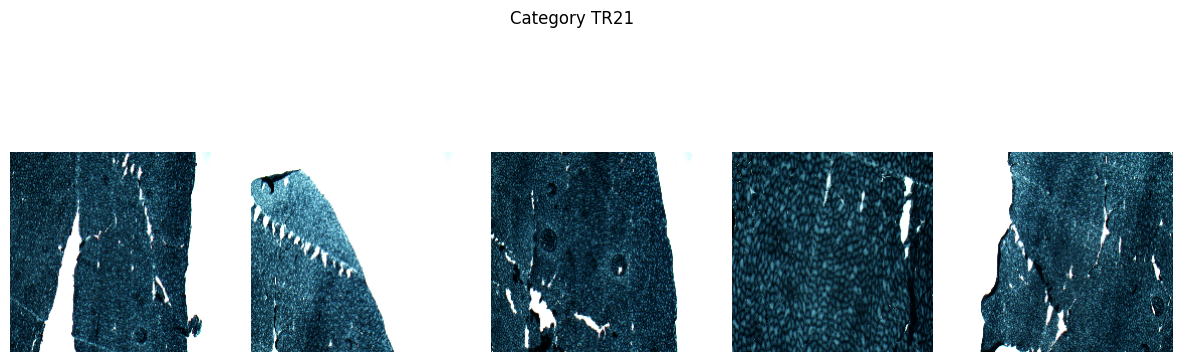

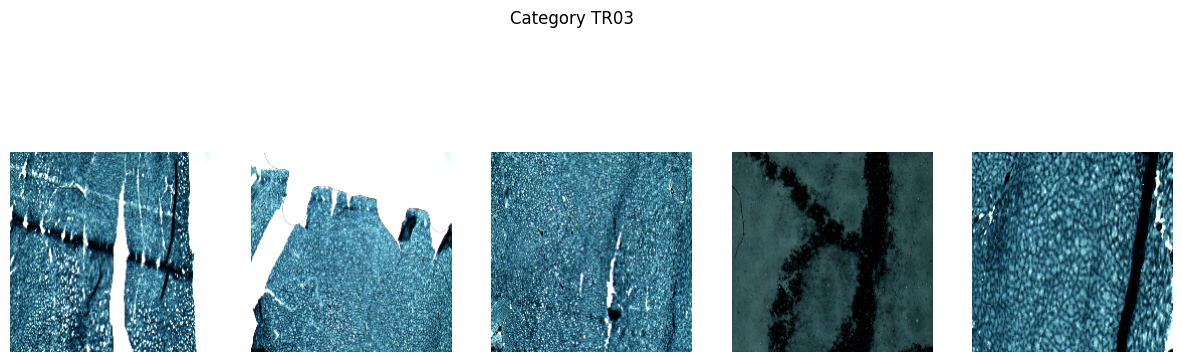

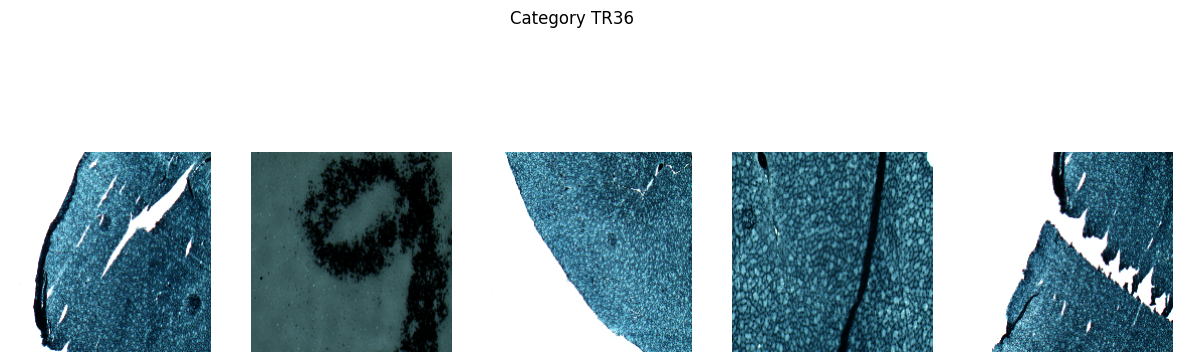

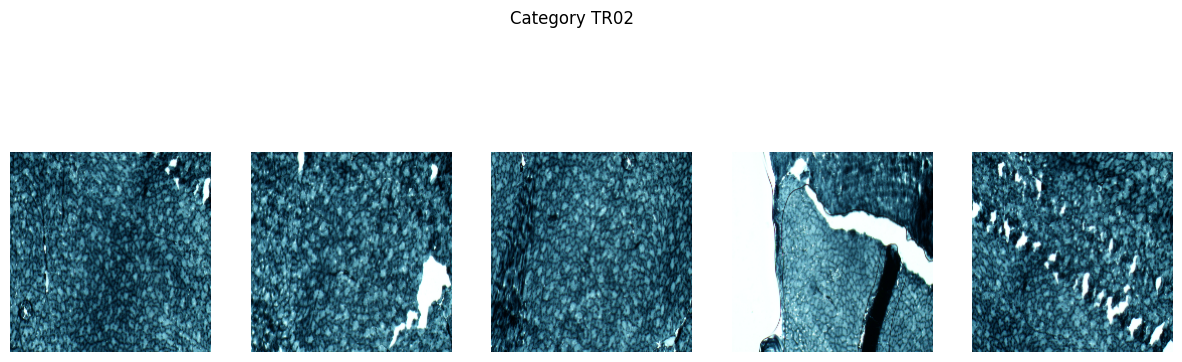

In [ ]:
import matplotlib.pyplot as plt

print ("\n Images from Spieces of Each Category\n ")
# Create a dictionary to group images by category
category_images = {}
for label, image in zip(labels, image_data):
    if label in category_images:
        category_images[label].append(image)
    else:
        category_images[label] = [image]

# Prepare to display 5 images from each category
categories_to_display = 5

# Create subplots for each category and display 5 images
for category, images in category_images.items():
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Category {category}')

    for i in range(min(categories_to_display, len(images))):
        plt.subplot(1, categories_to_display, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:


label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
print(X_train[:1])

[array([[[0.98431373, 1.        , 1.        ],
        [0.98431373, 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ],
        ...,
        [0.07843137, 0.32156863, 0.25882353],
        [0.1372549 , 0.29411765, 0.29019608],
        [0.14509804, 0.40392157, 0.39607843]],

       [[0.98823529, 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ],
        ...,
        [0.04313725, 0.15686275, 0.25098039],
        [0.07058824, 0.22352941, 0.27843137],
        [0.01568627, 0.15294118, 0.14509804]],

       [[0.99607843, 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.24313725, 0.45098039, 0.6       ],
        [0.09019608, 0.1372549 , 0.20392157],
        [0.00392157, 0.11764706, 0.1372549 ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 

In [ ]:
print(y_train[:1])

[2]


In [ ]:
print(X_test[:1])

[array([[[0.23137255, 0.45098039, 0.43921569],
        [0.25098039, 0.47058824, 0.51764706],
        [0.25882353, 0.49803922, 0.64313725],
        ...,
        [0.8627451 , 0.99607843, 0.98039216],
        [0.89019608, 0.99215686, 0.99215686],
        [0.94117647, 1.        , 0.99607843]],

       [[0.25882353, 0.49019608, 0.55294118],
        [0.38431373, 0.6627451 , 0.75686275],
        [0.23921569, 0.4627451 , 0.4627451 ],
        ...,
        [0.88627451, 0.99215686, 0.98039216],
        [0.88627451, 1.        , 0.98823529],
        [0.94509804, 1.        , 1.        ]],

       [[0.26666667, 0.53333333, 0.60784314],
        [0.35686275, 0.65490196, 0.7254902 ],
        [0.10980392, 0.30980392, 0.30980392],
        ...,
        [0.87058824, 0.99215686, 0.98039216],
        [0.90588235, 0.99607843, 0.98823529],
        [0.92941176, 1.        , 0.99607843]],

       ...,

       [[0.30980392, 0.54117647, 0.61960784],
        [0.19607843, 0.40392157, 0.49019608],
        [0.23529412, 

In [ ]:
print(y_test[:1])

[2]


In [ ]:
dataset_path = root_dir
image_size = (200, 200)
batch_size = 8


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have categorical labels
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 221 images belonging to 7 classes.
Found 51 images belonging to 7 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_generator, epochs=40, validation_data=validation_generator)


Epoch 1/40
28/28 [==============================] - 31s 1s/step - loss: 3.7538 - accuracy: 0.1403 - val_loss: 2.0440 - val_accuracy: 0.1569
Epoch 2/40
28/28 [==============================] - 31s 1s/step - loss: 2.0188 - accuracy: 0.1357 - val_loss: 2.1140 - val_accuracy: 0.1569
Epoch 3/40
28/28 [==============================] - 29s 1s/step - loss: 1.9518 - accuracy: 0.1719 - val_loss: 1.8742 - val_accuracy: 0.1569
Epoch 4/40
28/28 [==============================] - 31s 1s/step - loss: 1.8868 - accuracy: 0.1719 - val_loss: 1.9151 - val_accuracy: 0.2157
Epoch 5/40
28/28 [==============================] - 29s 1s/step - loss: 1.8943 - accuracy: 0.2579 - val_loss: 1.9000 - val_accuracy: 0.1373
Epoch 6/40
28/28 [==============================] - 29s 1s/step - loss: 1.8199 - accuracy: 0.2896 - val_loss: 1.9033 - val_accuracy: 0.2157
Epoch 7/40
28/28 [==============================] - 31s 1s/step - loss: 1.7337 - accuracy: 0.3439 - val_loss: 1.8388 - val_accuracy: 0.2745
Epoch 8/40
28/28 [==

In [ ]:
# Assuming you've trained the model using the steps in the previous response

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


7/7 [==============================] - 4s 504ms/step - loss: 1.9607 - accuracy: 0.0980
Test Loss: 1.9606633186340332
Test Accuracy: 0.09803921729326248


In [ ]:
# # Assuming you have a new image
# new_image = ...  # Load or preprocess your new image

# # Reshape the image to match the expected input shape
# new_image = np.expand_dims(new_image, axis=0)

# # Perform prediction
# predictions = model.predict(new_image)

# # Decode the predictions to obtain class labels
# predicted_class = np.argmax(predictions, axis=1)
# print(f'Predicted Class: {predicted_class}')


7/7 [==============================] - 4s 457ms/step


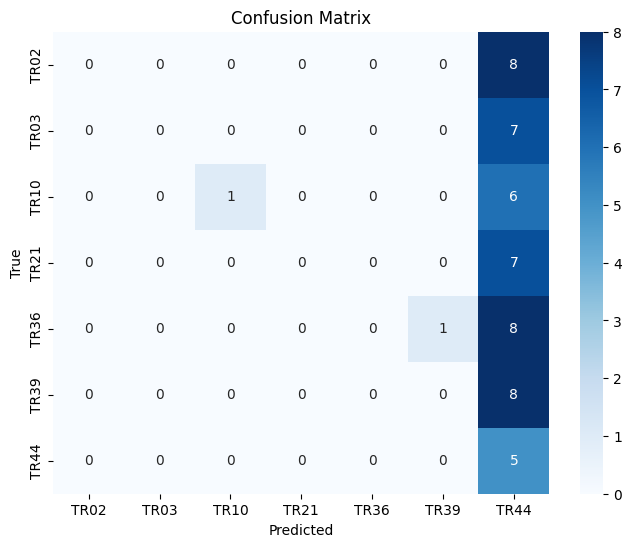

              precision    recall  f1-score   support

        TR02       0.00      0.00      0.00         8
        TR03       0.00      0.00      0.00         7
        TR10       1.00      0.14      0.25         7
        TR21       0.00      0.00      0.00         7
        TR36       0.00      0.00      0.00         9
        TR39       0.00      0.00      0.00         8
        TR44       0.10      1.00      0.19         5

    accuracy                           0.12        51
   macro avg       0.16      0.16      0.06        51
weighted avg       0.15      0.12      0.05        51



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained the model and have a test generator
predictions = model.predict(validation_generator)
y_true = validation_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
class_report = classification_report(y_true, y_pred, target_names=train_generator.class_indices)
print(class_report)
